Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Dataset Shape:  (5087, 3198)
Head of the Dataset: 
   LABEL   FLUX.1   FLUX.2   FLUX.3  ...  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197
0      2    93.85    83.81    20.10  ...      39.32      61.42       5.08     -39.54
1      2   -38.88   -33.83   -58.54  ...     -11.70       6.46      16.00      19.93
2      2   532.64   535.92   513.73  ...     -11.80     -28.91     -70.02     -96.67
3      2   326.52   347.39   302.35  ...      -8.77     -17.31     -17.35      13.98
4      2 -1107.21 -1112.59 -1118.95  ...    -399.71    -384.65    -411.79    -510.54

[5 rows x 3198 columns]
Before OverSampling:  Counter({1: 3535, 2: 25})
After OverSampling:  Counter({1: 3535, 2: 3535})
Confusion Matrix: 
[[1463   52]
 [   7    5]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.97      0.98      1515
       

Text(0, 0.5, 'Mean Error')

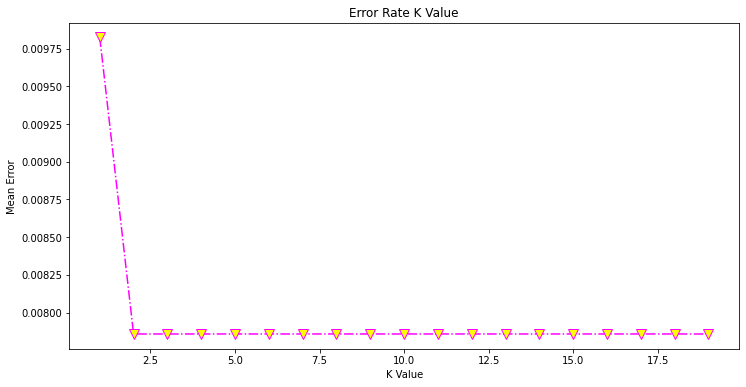

In [ ]:
#1
#Importing libraries
!pip install imblearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importing the dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
DS = pd.read_csv('gdrive/My Drive/AI LABS/Exoplanets_Dataset.csv')
#Shape of the dataset
print ("Dataset Shape: ", DS.shape)
#First 5 rows from the dataset
print ("Head of the Dataset: ")
print (DS.head())

#2
#Separating the dataset into attributes and labels
attributes = DS.iloc[:, 1:].values
label = DS.iloc[:, 0].values

#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
attributes_train, attributes_test, label_train, label_test = \
train_test_split(attributes, label, test_size=0.30,random_state = 100)

#3
#Performing synthetic minority oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter
c = Counter(label_train) 
print('Before OverSampling: ' , c)
s = SMOTE()
attributes_train_sm, label_train_sm = \
s.fit_resample(attributes_train, label_train)
c = Counter(label_train_sm) 
print('After OverSampling: ' , c)

#4
#Training the KNN
from sklearn.neighbors import KNeighborsClassifier
prediction = KNeighborsClassifier(n_neighbors = 10)
prediction.fit(attributes_train_sm, label_train_sm)
#Prediction
label_pred = prediction.predict(attributes_test)

#5
#Evaluating 
from sklearn.metrics import classification_report, confusion_matrix , \
accuracy_score 
print("Confusion Matrix: ")
print(confusion_matrix(label_test, label_pred))
print("Classification Report: ")
print(classification_report(label_test, label_pred))
#Accuray of the model
print("Accuracy: ", accuracy_score(label_test, label_pred))

#6 
#Comparing Error Rate with the K Value
error = []
#Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(attributes_train, label_train)
    pred_i = knn.predict(attributes_test)
    error.append(np.mean(pred_i != label_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='magenta', linestyle='-.', marker='v',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')    
